In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

In [5]:
df = pd.read_csv(file_name)

In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [7]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<ipython-input-8-e36871ca1f44>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist=False)


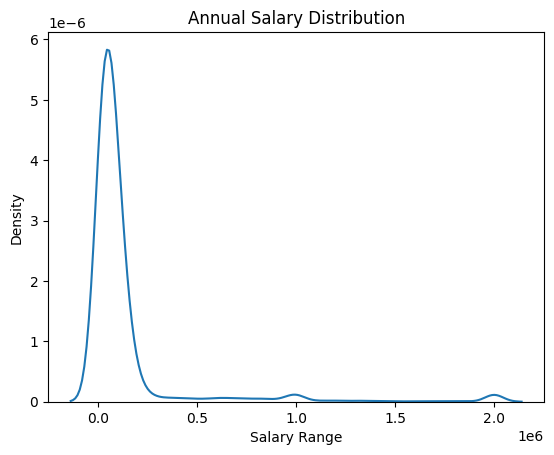

In [8]:
sns.distplot(df['ConvertedComp'], hist=False)
plt.title('Annual Salary Distribution')
plt.xlabel('Salary Range')
plt.show()

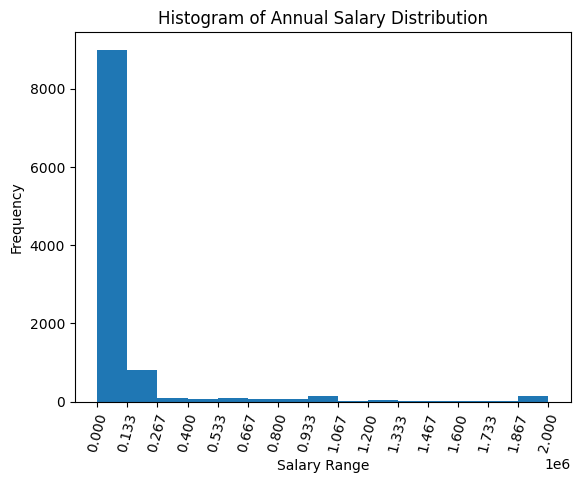

In [9]:
count, bin_edges = np.histogram(df['ConvertedComp'], 15, (df['ConvertedComp'].min(), df['ConvertedComp'].max()))
df['ConvertedComp'].plot.hist(bins=15, xticks=bin_edges, rot=75)
plt.title('Histogram of Annual Salary Distribution')
plt.xlabel('Salary Range')
plt.show()

In [10]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [11]:
print(df['Gender'].value_counts())

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64


In [12]:
df_woman = df[df['Gender'] == 'Woman']
df_woman['ConvertedComp'].median()

57708.0

In [13]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

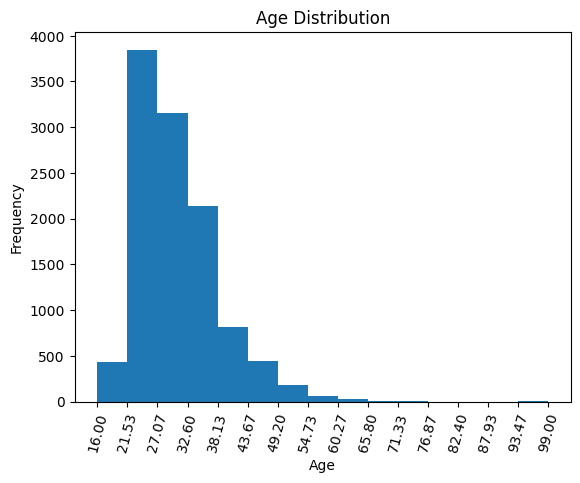

In [14]:
count, bin_edges = np.histogram(df['Age'], 15, (df['Age'].min(), df['Age'].max()))
df['Age'].plot.hist(bins=15, xticks=bin_edges, rot=75)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Annual Salary Box Plot')

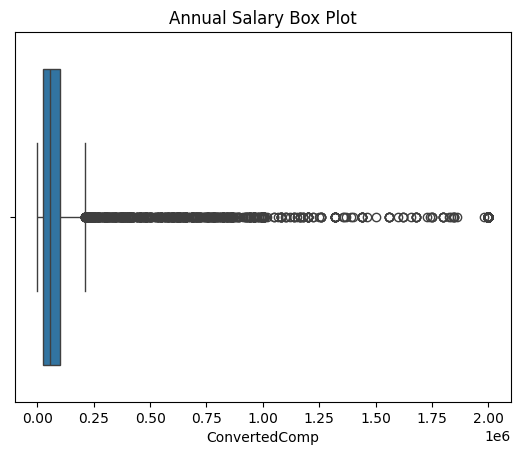

In [15]:
sns.boxplot(x=df['ConvertedComp'])
plt.title('Annual Salary Box Plot')

Text(0.5, 1.0, 'Age Box Plot')

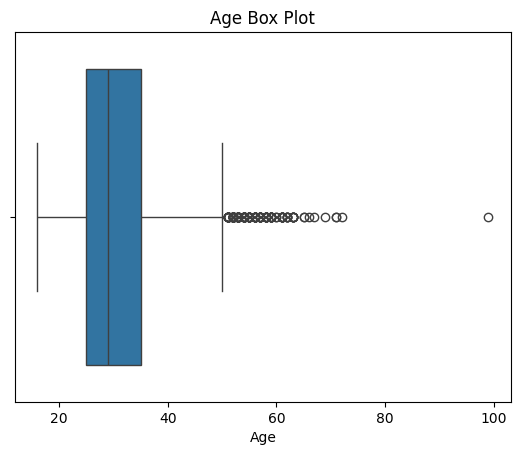

In [27]:
sns.boxplot(x=df['Age'])
plt.title('Age Box Plot')

In [16]:
iqr = df['ConvertedComp'].quantile(q=0.75) - df['ConvertedComp'].quantile(q=0.25)
print('interquartile range: ', iqr)

interquartile range:  73132.0


In [17]:
upper_bound = df['ConvertedComp'].quantile(q=0.75) + 1.5 * iqr
lower_bound = df['ConvertedComp'].quantile(q=0.25) - 1.5 * iqr
print('Upper bound: ', upper_bound)
print('Lower bound: ', lower_bound)

Upper bound:  209698.0
Lower bound:  -82830.0


In [18]:
outliers_count = df['ConvertedComp'][df['ConvertedComp'] > upper_bound].count()
print('There are', outliers_count, 'outliers in the ConvertedComp column (Annual Salary)')

There are 879 outliers in the ConvertedComp column (Annual Salary)


In [19]:
df_new = pd.DataFrame(df[df['ConvertedComp'] <= upper_bound])
print(df_new.shape)
print(df.shape)

(9703, 85)
(11398, 85)


In [20]:
df['ConvertedComp'][df['ConvertedComp'] <= upper_bound].count()

9703

In [21]:
df['ConvertedComp'][df['ConvertedComp'] > upper_bound].count()

879

In [22]:
df['ConvertedComp'].count()

10582

In [23]:
df.corr(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [26]:
df_new['ConvertedComp'].median()

52704.0

In [28]:
df_new['ConvertedComp'].mean()

59883.20838915799